In [5]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report
import joblib
from sklearn.neighbors import KNeighborsClassifier

In [6]:
df=pd.read_csv("C:/Users/anant/Downloads/loan_default_prediction_project_complete (1).csv")

In [7]:
df.head()

,Age,Gender,Income,Employment_Status,Location,Credit_Score,Debt_to_Income_Ratio,Existing_Loan_Balance,Loan_Status,Loan_Amount,Interest_Rate,Loan_Duration_Months
0,56,Male,91910.323246,Employed,Urban,615,0.462601,3580.203540,Non-Default,27160.609602,11.562543,27
1,46,Male,81880.547904,NaN,Urban,702,0.637618,38762.098480,Non-Default,22931.663587,5.241453,54
2,32,NaN,89696.082903,Unemployed,Suburban,747,0.431507,8412.342168,Non-Default,6787.299376,6.928529,55
3,60,Male,37123.175342,NaN,Suburban,846,0.421620,2051.077370,Non-Default,29646.934665,14.422941,17
4,25,Male,67655.479665,Unemployed,Rural,425,0.431039,29518.957965,Default,11137.769677,10.970186,21


In [8]:
df.tail()

,Age,Gender,Income,Employment_Status,Location,Credit_Score,Debt_to_Income_Ratio,Existing_Loan_Balance,Loan_Status,Loan_Amount,Interest_Rate,Loan_Duration_Months
9995,33,Male,94318.593216,Employed,Rural,359,0.458550,32652.095340,Non-Default,13581.669336,15.286204,58
9996,29,Female,22480.468746,Employed,Urban,671,0.310884,30803.407227,Non-Default,28718.251112,6.409365,71
9997,18,Male,88172.496665,Employed,Urban,441,0.282163,8665.007815,Default,22755.220904,8.818762,51
9998,25,NaN,51788.871823,Employed,Rural,417,0.370681,36921.116660,Non-Default,29066.184090,14.516478,50
9999,30,Male,64928.131098,Employed,Urban,491,0.398061,38011.311647,Non-Default,15382.129443,12.316036,39


In [9]:
df.head().isnull().sum()

Age                      0
Gender                   1
Income                   0
Employment_Status        2
Location                 0
Credit_Score             0
Debt_to_Income_Ratio     0
Existing_Loan_Balance    0
Loan_Status              0
Loan_Amount              0
Interest_Rate            0
Loan_Duration_Months     0
dtype: int64

In [10]:
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df['Employment_Status'].fillna('Unknown', inplace=True)

C:\Users\anant\AppData\Local\Temp\ipykernel_32252\3301474181.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
C:\Users\anant\AppData\Local\Temp\ipykernel_32252\3301474181.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

In [11]:
df.isnull().sum()

Age                      0
Gender                   0
Income                   0
Employment_Status        0
Location                 0
Credit_Score             0
Debt_to_Income_Ratio     0
Existing_Loan_Balance    0
Loan_Status              0
Loan_Amount              0
Interest_Rate            0
Loan_Duration_Months     0
dtype: int64

C:\Users\anant\AppData\Local\Temp\ipykernel_32252\1859834715.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Loan_Status', palette='Set2')


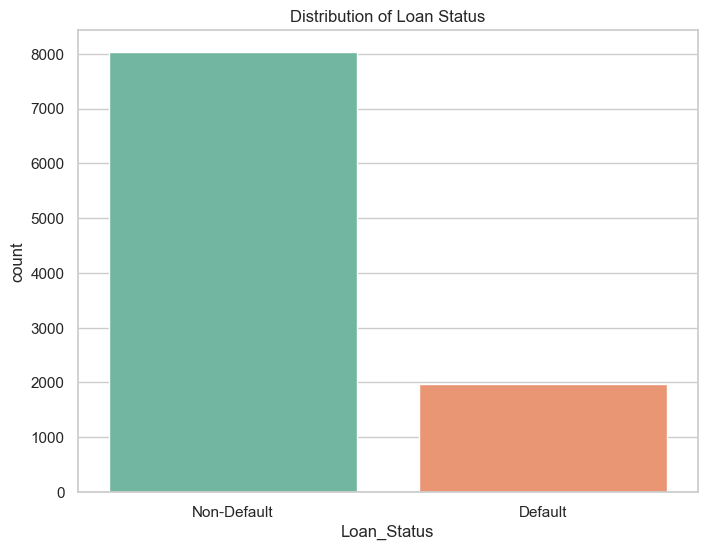

In [12]:
# Set the aesthetics for the plots
sns.set(style='whitegrid')

# Plot 1: Distribution of Loan Status
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Loan_Status', palette='Set2')
plt.title('Distribution of Loan Status')
plt.show()

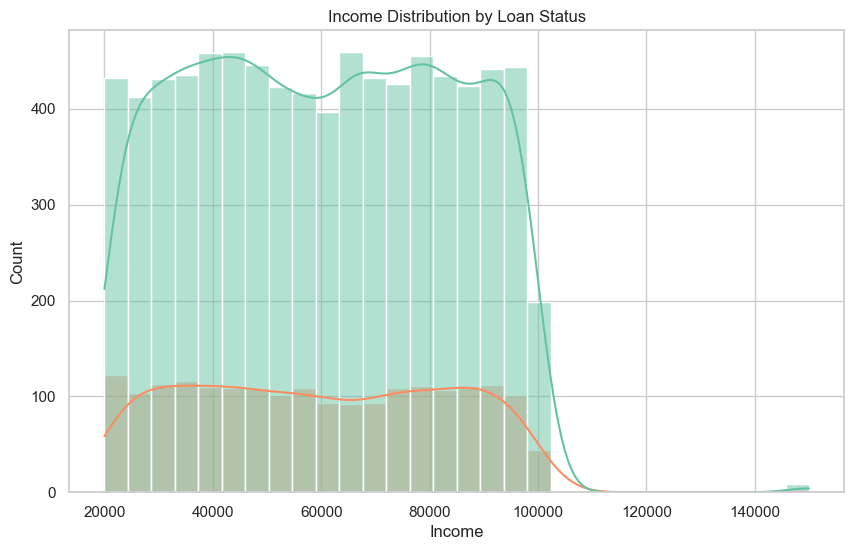

In [13]:
# Plot 2: Income distribution by Loan Status
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Income', hue='Loan_Status', kde=True, bins=30, palette='Set2',legend=False)
plt.title('Income Distribution by Loan Status')
plt.show()

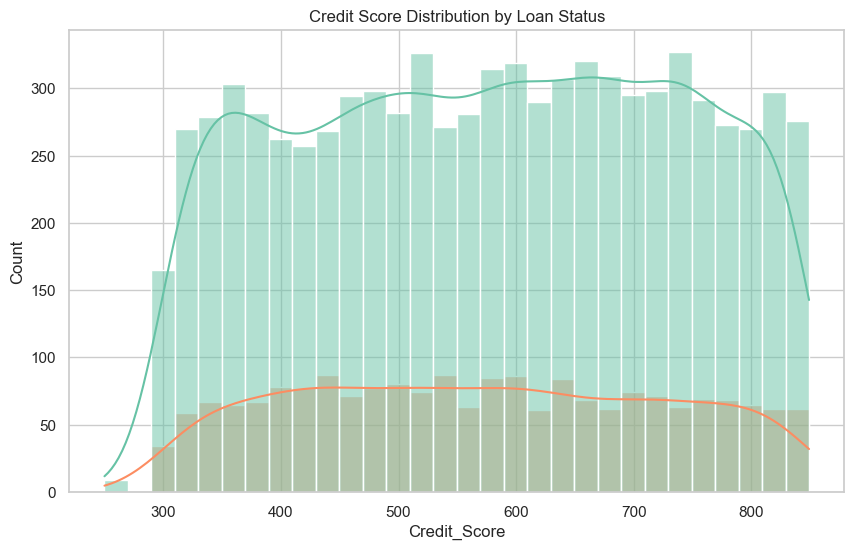

In [14]:
# Plot 3: Credit Score distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Credit_Score', hue='Loan_Status', kde=True, bins=30, palette='Set2',legend=False)
plt.title('Credit Score Distribution by Loan Status')
plt.show()

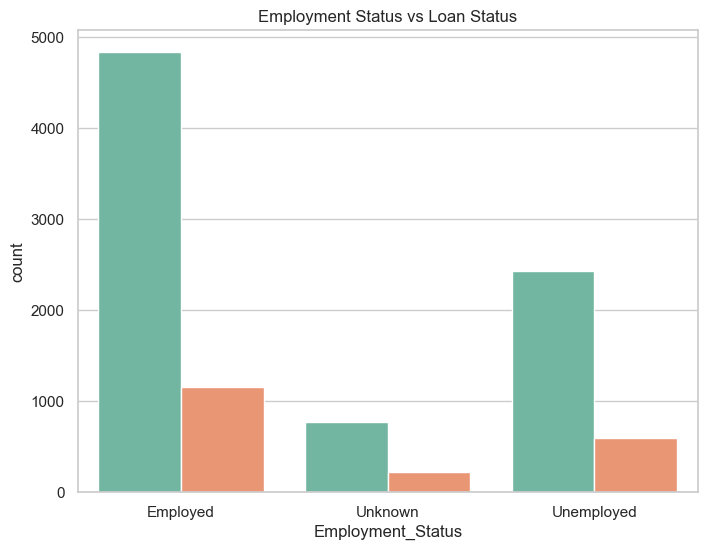

In [15]:
# Plot 4: Employment Status vs Loan Status
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Employment_Status', hue='Loan_Status', palette='Set2',legend=False)
plt.title('Employment Status vs Loan Status')
plt.show()

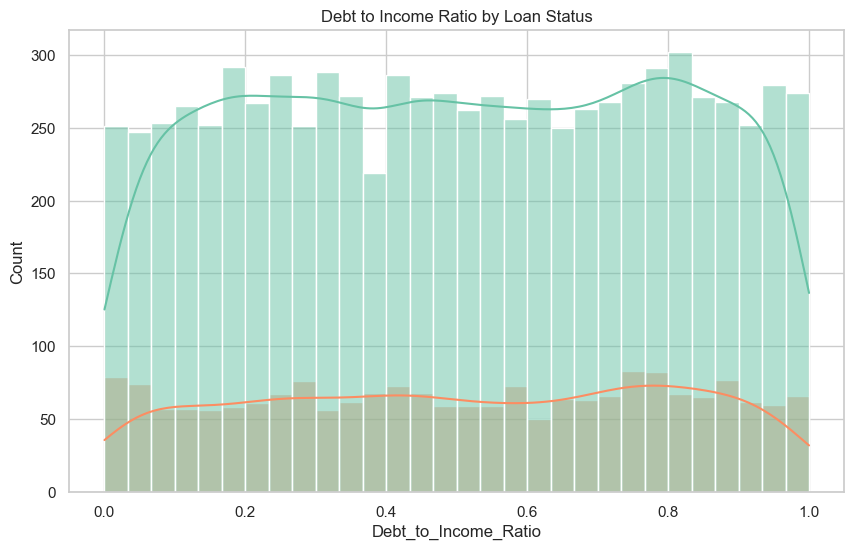

In [16]:
# Plot 5: Debt to Income Ratio vs Loan Status
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Debt_to_Income_Ratio', hue='Loan_Status', kde=True, bins=30, palette='Set2',legend=False)
plt.title('Debt to Income Ratio by Loan Status')
plt.show()

C:\Users\anant\AppData\Local\Temp\ipykernel_32252\2240902910.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Loan_Status', y='Loan_Amount', palette='Set2')


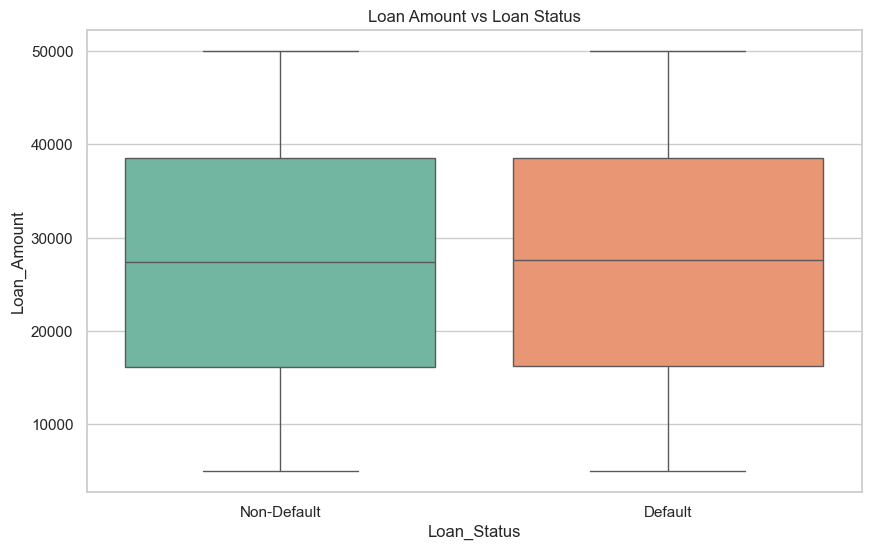

In [17]:
# Plot 6: Loan Amount vs Loan Status
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Loan_Status', y='Loan_Amount', palette='Set2')
plt.title('Loan Amount vs Loan Status')
plt.show()

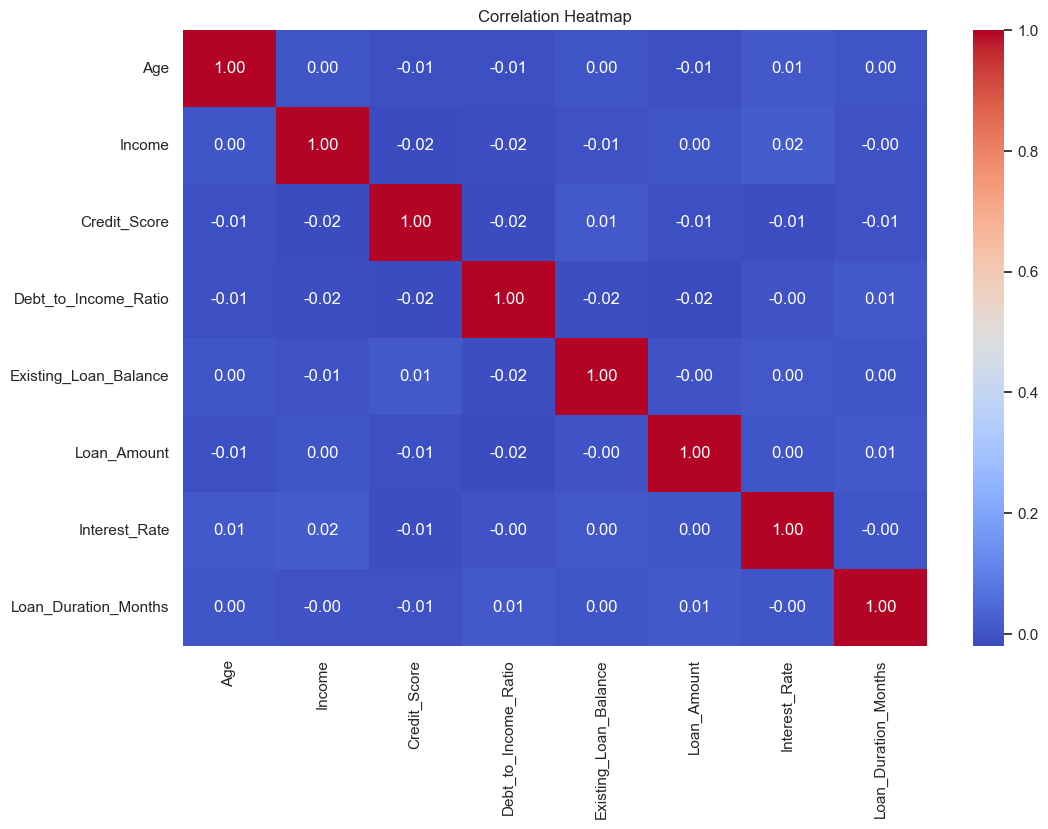

In [18]:
# Plot 7: Correlation heatmap
plt.figure(figsize=(12, 8))
corr_matrix = df.select_dtypes(include=['number']).corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

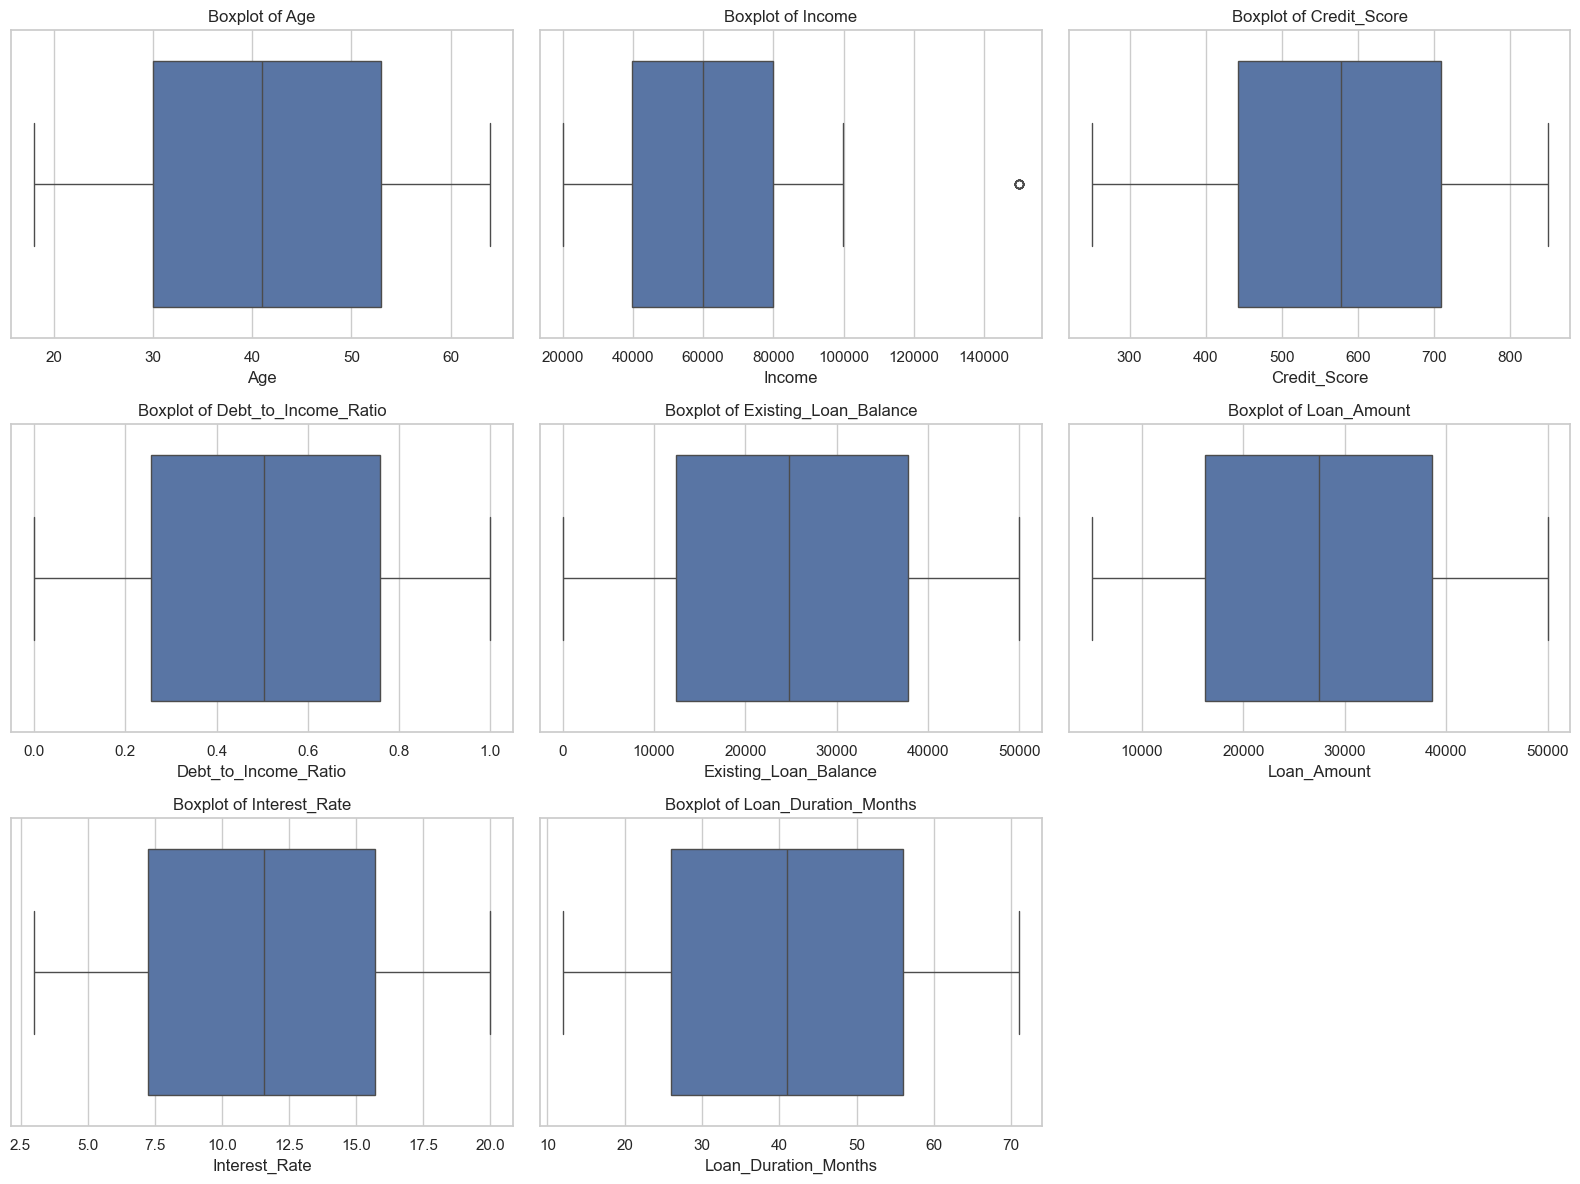

In [19]:
# Set up the matplotlib figure
plt.figure(figsize=(16, 12))

# List of numerical columns to analyze
numerical_columns = ['Age', 'Income', 'Credit_Score', 'Debt_to_Income_Ratio',
                     'Existing_Loan_Balance', 'Loan_Amount', 'Interest_Rate', 'Loan_Duration_Months']

# Create a boxplot for each numerical column to detect outliers
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

In [20]:
# Function to remove outliers based on IQR
def remove_outliers_iqr(df, numerical_cols):
    for col in numerical_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        
        # Define the lower and upper bounds
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Remove outliers
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
        
    return df

# List of numerical columns to check for outliers
numerical_cols = ['Income', 'Credit_Score', 'Debt_to_Income_Ratio', 
                  'Existing_Loan_Balance', 'Loan_Amount', 
                  'Interest_Rate', 'Loan_Duration_Months']

# Remove outliers
df_cleaned = remove_outliers_iqr(df, numerical_cols)

# Print shape of original and cleaned data for comparison
print(f"Original data shape: {df.shape}")
print(f"Cleaned data shape: {df_cleaned.shape}")

Original data shape: (10000, 12)
Cleaned data shape: (9990, 12)


In [21]:
df['Loan_Status'] = df['Loan_Status'].map({'Non-Default': 0, 'Default': 1})

In [332]:
df.to_csv('clean_data_final.csv')

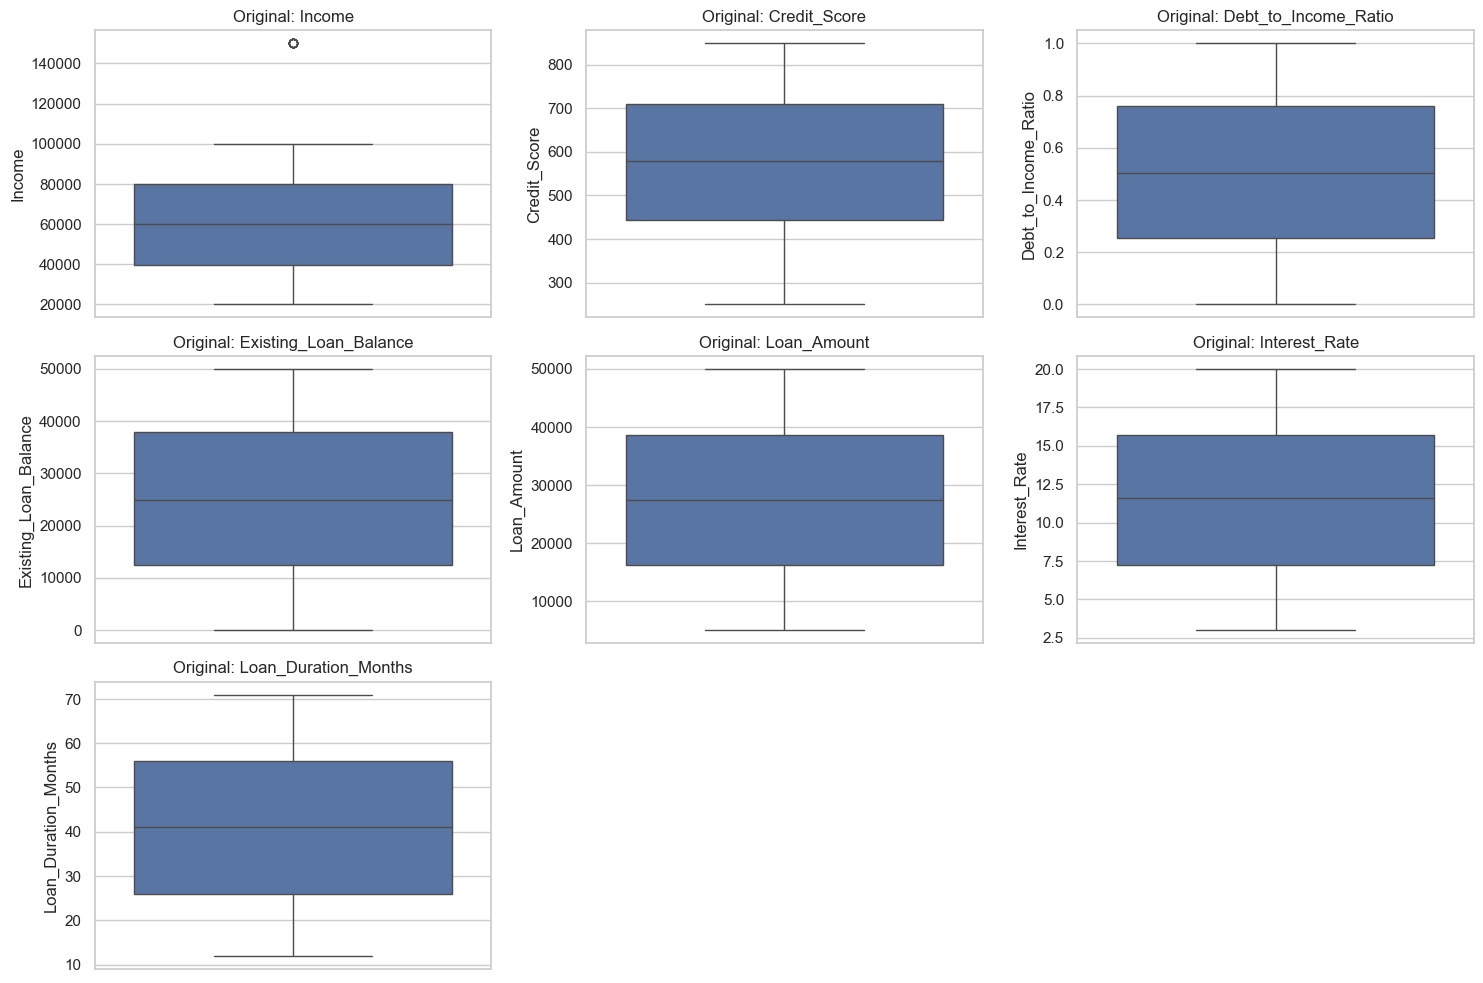

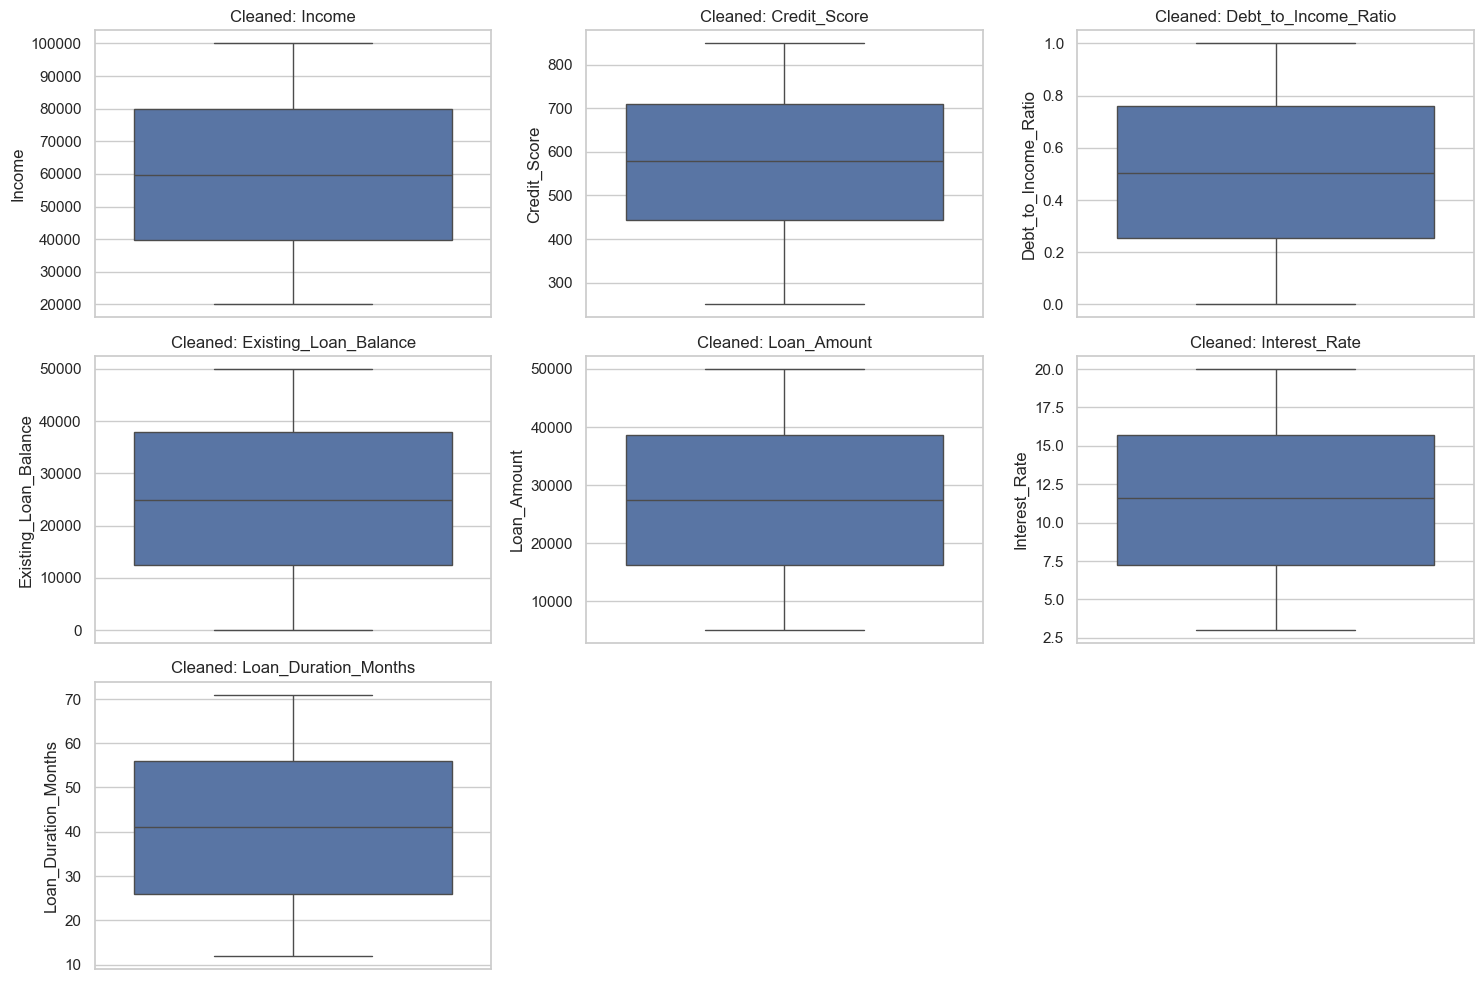

In [22]:
# Visualize the outliers before and after removal
def plot_boxplots(df_original, df_cleaned, numerical_cols):
    plt.figure(figsize=(15, 10))
    
    for i, col in enumerate(numerical_cols, 1):
        plt.subplot(3, 3, i)
        sns.boxplot(data=df_original, y=col)
        plt.title(f'Original: {col}')
    
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(15, 10))
    
    for i, col in enumerate(numerical_cols, 1):
        plt.subplot(3, 3, i)
        sns.boxplot(data=df_cleaned, y=col)
        plt.title(f'Cleaned: {col}')
    
    plt.tight_layout()
    plt.show()

# Plot boxplots for original and cleaned data
plot_boxplots(df, df_cleaned, numerical_cols)

In [23]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
import shap

In [24]:
# Step 2: Data Overview
def data_overview(df):
    print("First few rows of data:\n", df.head())
    print("\nLast few rows of data:\n", df.tail())
    print("\nData Info:\n", df.info())
    print("\nMissing Values:\n", df.isnull().sum())
    print("\nStatistical Summary:\n", df.describe())

data_overview(df)

First few rows of data:
    Age  Gender        Income Employment_Status  Location  Credit_Score  \
0   56    Male  91910.323246          Employed     Urban           615   
1   46    Male  81880.547904           Unknown     Urban           702   
2   32  Female  89696.082903        Unemployed  Suburban           747   
3   60    Male  37123.175342           Unknown  Suburban           846   
4   25    Male  67655.479665        Unemployed     Rural           425   

   Debt_to_Income_Ratio  Existing_Loan_Balance  Loan_Status   Loan_Amount  \
0              0.462601            3580.203540            0  27160.609602   
1              0.637618           38762.098480            0  22931.663587   
2              0.431507            8412.342168            0   6787.299376   
3              0.421620            2051.077370            0  29646.934665   
4              0.431039           29518.957965            1  11137.769677   

   Interest_Rate  Loan_Duration_Months  
0      11.562543          

In [25]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
cols=['Gender','Employment_Status','Location']
le=LabelEncoder()
for col in cols:
  df[col]=le.fit_transform(df[col])

In [26]:
# scaler = StandardScaler()
from sklearn.preprocessing import MinMaxScaler
minmax=MinMaxScaler()
num_cols = ['Age', 'Income', 'Credit_Score', 'Debt_to_Income_Ratio',
            'Existing_Loan_Balance', 'Loan_Amount', 'Interest_Rate',
            'Loan_Duration_Months']
df[num_cols]=minmax.fit_transform(df[num_cols])

In [27]:
df.head()

,Age,Gender,Income,Employment_Status,Location,Credit_Score,Debt_to_Income_Ratio,Existing_Loan_Balance,Loan_Status,Loan_Amount,Interest_Rate,Loan_Duration_Months
0,0.826087,1,0.553154,0,2,0.609349,0.462624,0.071520,0,0.492393,0.503610,0.254237
1,0.608696,1,0.476001,2,2,0.754591,0.637667,0.775467,0,0.398336,0.131663,0.711864
2,0.304348,0,0.536121,1,1,0.829716,0.431526,0.168205,0,0.039263,0.230934,0.728814
3,0.913043,1,0.131712,2,1,0.994992,0.421637,0.040924,0,0.547692,0.671922,0.084746
4,0.152174,1,0.366577,1,0,0.292154,0.431057,0.590523,1,0.136024,0.468754,0.152542


In [28]:
df.isnull().sum()

Age                      0
Gender                   0
Income                   0
Employment_Status        0
Location                 0
Credit_Score             0
Debt_to_Income_Ratio     0
Existing_Loan_Balance    0
Loan_Status              0
Loan_Amount              0
Interest_Rate            0
Loan_Duration_Months     0
dtype: int64

In [29]:
df.head()

,Age,Gender,Income,Employment_Status,Location,Credit_Score,Debt_to_Income_Ratio,Existing_Loan_Balance,Loan_Status,Loan_Amount,Interest_Rate,Loan_Duration_Months
0,0.826087,1,0.553154,0,2,0.609349,0.462624,0.071520,0,0.492393,0.503610,0.254237
1,0.608696,1,0.476001,2,2,0.754591,0.637667,0.775467,0,0.398336,0.131663,0.711864
2,0.304348,0,0.536121,1,1,0.829716,0.431526,0.168205,0,0.039263,0.230934,0.728814
3,0.913043,1,0.131712,2,1,0.994992,0.421637,0.040924,0,0.547692,0.671922,0.084746
4,0.152174,1,0.366577,1,0,0.292154,0.431057,0.590523,1,0.136024,0.468754,0.152542


In [341]:
df.to_csv("loan_cleandata_scaled_encoded.csv", index=False)

In [30]:

# Assuming 'data' is your dataset with a 'target' column for loan default
X = df.drop('Loan_Status', axis=1)  # Features
y = df['Loan_Status']  # Target (loan default)

# Train-Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)

In [31]:

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8000, 11), (2000, 11), (8000,), (2000,))

                  Feature  Importance
6    Debt_to_Income_Ratio    0.126762
7   Existing_Loan_Balance    0.126636
8             Loan_Amount    0.124110
2                  Income    0.124108
9           Interest_Rate    0.121608
5            Credit_Score    0.117097
10   Loan_Duration_Months    0.097714
0                     Age    0.092715
4                Location    0.028141
3       Employment_Status    0.024008
1                  Gender    0.017102


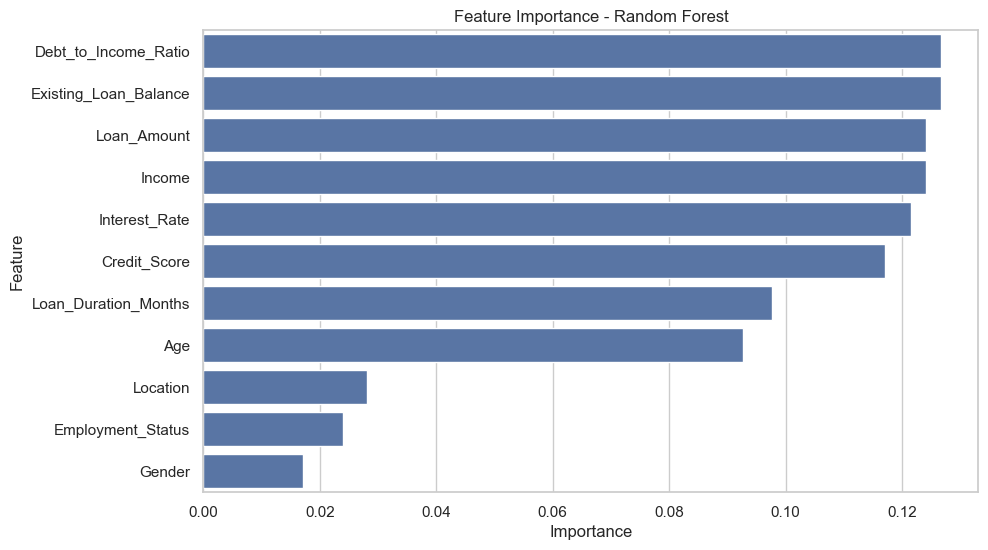

In [32]:


# Initialize and train the Random Forest classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Get feature importance scores
importances = rf_model.feature_importances_

# Create a DataFrame for better visualization
feature_importances_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Print the feature importances
print(feature_importances_df)
# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances_df)
plt.title('Feature Importance - Random Forest')
plt.show()

DATA BALANCING WITH SMOTE TECHINQUE AND MACHINE LEARNING MODEL EVALUVATION:

In [33]:

#Apply SMOTE to the training data
smote = SMOTE(random_state=15,sampling_strategy='minority')
X_sm , y_sm = smote.fit_resample(X,y)

In [34]:

y.value_counts()

Loan_Status
0    8033
1    1967
Name: count, dtype: int64

In [35]:

X_sm.shape,y_sm.shape,y_sm.value_counts()

((16066, 11),
 (16066,),
 Loan_Status
 0    8033
 1    8033
 Name: count, dtype: int64)

In [36]:

X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=42,stratify=y_sm)

--- Logistic Regression ---
Accuracy: 0.5271
Precision: 0.5279
Recall: 0.5121
F1-Score: 0.5199
AUC: 0.5298
--- Decision Tree ---
Accuracy: 0.7489
Precision: 0.7421
Recall: 0.7629
F1-Score: 0.7524
AUC: 0.7489
--- Random Forest ---
Accuracy: 0.7847
Precision: 0.7785
Recall: 0.7959
F1-Score: 0.7871
AUC: 0.8687
--- Gradient Boosting ---
Accuracy: 0.6724
Precision: 0.6530
Recall: 0.7355
F1-Score: 0.6918
AUC: 0.7413


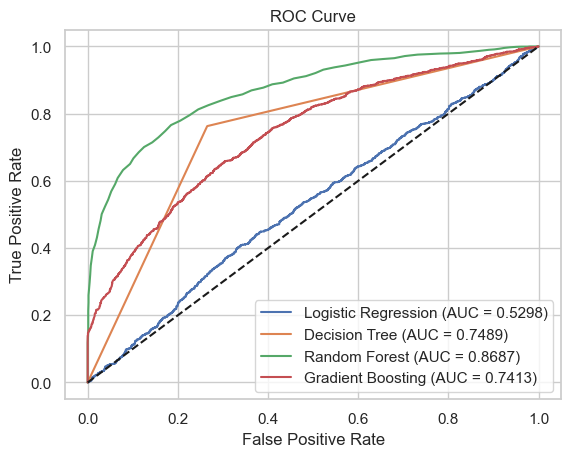

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Assuming X_train, X_test, y_train, y_test are already encoded and scaled

# Define your models
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
}

# Evaluate models
for name, model in models.items():
    clf = Pipeline(steps=[('classifier', model)])  # No preprocessor, just the classifier
    clf.fit(X_train, y_train)  # Train model
    y_pred = clf.predict(X_test)  # Predict labels
    y_pred_proba = clf.predict_proba(X_test)[:, 1]  # Probabilities for ROC AUC
    
    print(f"--- {name} ---")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(f"Precision: {precision_score(y_test, y_pred):.4f}")
    print(f"Recall: {recall_score(y_test, y_pred):.4f}")
    print(f"F1-Score: {f1_score(y_test, y_pred):.4f}")
    print(f"AUC: {roc_auc_score(y_test, y_pred_proba):.4f}")
    
    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc_score(y_test, y_pred_proba):.4f})')

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

--- Logistic Regression ---
Best Params: {'classifier__C': 0.1, 'classifier__penalty': 'l2'}
Accuracy: 0.5258
Precision: 0.5267
Recall: 0.5096
F1-Score: 0.5180
AUC: 0.5298
--- Decision Tree ---
Best Params: {'classifier__max_depth': None, 'classifier__min_samples_split': 10}
Accuracy: 0.7567
Precision: 0.7609
Recall: 0.7486
F1-Score: 0.7547
AUC: 0.7970
--- Random Forest ---
Best Params: {'classifier__max_depth': None, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 300}
Accuracy: 0.7915
Precision: 0.7790
Recall: 0.8139
F1-Score: 0.7961
AUC: 0.8774
--- Gradient Boosting ---
Best Params: {'classifier__learning_rate': 0.2, 'classifier__max_depth': 10, 'classifier__n_estimators': 200}
Accuracy: 0.8591
Precision: 0.9438
Recall: 0.7635
F1-Score: 0.8442
AUC: 0.9073


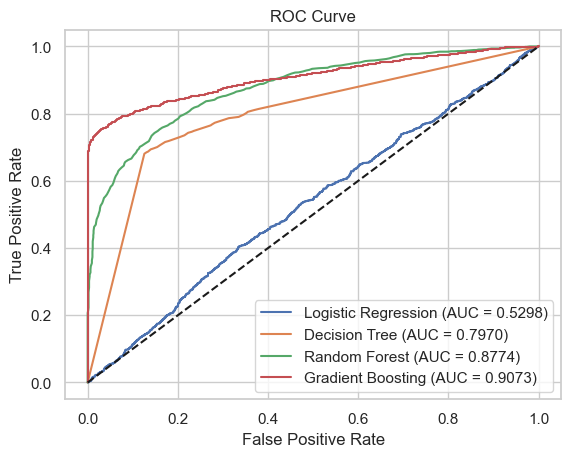

In [45]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameter grids for each model
param_grids = {
    'Logistic Regression': {
        'classifier__C': [0.1, 1, 10, 100],
        'classifier__penalty': ['l2']
    },
    'Decision Tree': {
        'classifier__max_depth': [3, 5, 10, None],
        'classifier__min_samples_split': [2, 5, 10]
    },
    'Random Forest': {
        'classifier__n_estimators': [100, 200, 300],
        'classifier__max_depth': [3, 5, 10, None],
        'classifier__min_samples_split': [2, 5, 10]
    },
    'Gradient Boosting': {
        'classifier__n_estimators': [100, 200, 300],
        'classifier__learning_rate': [0.01, 0.1, 0.2],
        'classifier__max_depth': [3, 5, 10]
    }
}

# Perform hyperparameter tuning and evaluate each model
for name, model in models.items():
    clf = Pipeline(steps=[('classifier', model)])
    grid_search = GridSearchCV(clf, param_grids[name], cv=5, scoring='roc_auc', n_jobs=-1)
    
    # Fit the model with the best hyperparameters
    grid_search.fit(X_train, y_train)
    
    # Use the best model for predictions
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)
    y_pred_proba = best_model.predict_proba(X_test)[:, 1]
    
    print(f"--- {name} ---")
    print(f"Best Params: {grid_search.best_params_}")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(f"Precision: {precision_score(y_test, y_pred):.4f}")
    print(f"Recall: {recall_score(y_test, y_pred):.4f}")
    print(f"F1-Score: {f1_score(y_test, y_pred):.4f}")
    print(f"AUC: {roc_auc_score(y_test, y_pred_proba):.4f}")
    
    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc_score(y_test, y_pred_proba):.4f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [46]:
import joblib

# Assuming the grid search has already been done for all models including Gradient Boosting

# Check if the model is Gradient Boosting and save it
best_gradient_boosting_model = grid_search.best_estimator_ if 'Gradient Boosting' in models else None

if best_gradient_boosting_model:
    print(f"Saving the best Gradient Boosting model...")
    joblib.dump(best_gradient_boosting_model, 'best_gradient_boosting_model.pkl')
else:
    print("No Gradient Boosting model found.")

Saving the best Gradient Boosting model...


Comparison Table:
           Model  Accuracy  F1 Score  Precision  Recall  ROC AUC
        Logistic    0.5258    0.5180     0.5297  0.5496   0.5298
   Decision Tree    0.7467    0.7547     0.7609  0.7486   0.7970
   Random Forest    0.7915    0.7961     0.7749  0.8313   0.8774
GradientBoosting    0.8591    0.8442     0.9438  0.8139   0.9073

Best Model Based on F1 Score:
Model        GradientBoosting
Accuracy               0.8591
F1 Score               0.8442
Precision              0.9438
Recall                 0.8139
ROC AUC                0.9073
Name: 3, dtype: object


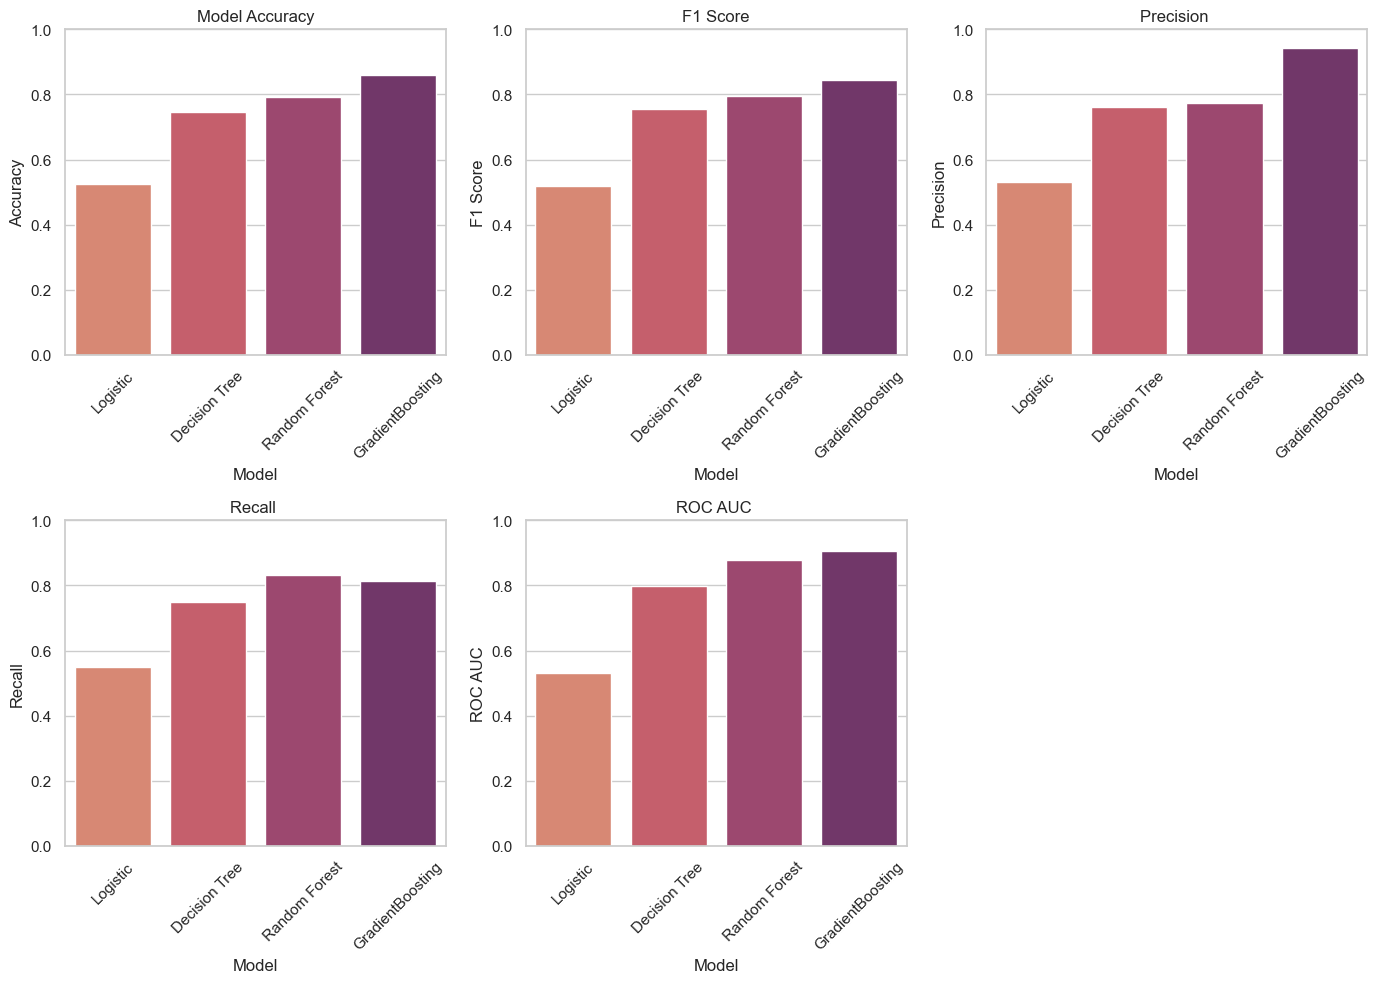

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


# Data for comparison based on your provided outputs
data = {
    'Model': ['Logistic','Decision Tree','Random Forest', 'GradientBoosting'],
    'Accuracy': [0.5258,0.7467,0.7915, 0.8591],
    'F1 Score': [0.5180,0.7547,0.7961,0.8442],
    'Precision':[0.5297,0.7609,0.7749,0.9438],
    'Recall':[0.5496,0.7486,0.8313,0.8139],
    'ROC AUC':[0.5298,0.7970,0.8774,0.9073]


}

# Convert to DataFrame
df = pd.DataFrame(data)

# Print comparison table
print("Comparison Table:")
print(df.to_string(index=False))

# Find the best model based on Macro-F1 Score
best_model = df.loc[df['F1 Score'].idxmax()]

# Print the best model
print("\nBest Model Based on F1 Score:")
print(best_model)
# Set the figure size
plt.figure(figsize=(14, 10))

# Plot for Accuracy
plt.subplot(2, 3, 1)
sns.barplot(x='Model', y='Accuracy', data=df, palette="flare", hue='Model', dodge=False)
plt.title('Model Accuracy')
plt.ylim(0, 1)
plt.xticks(rotation=45)

# Plot for Macro-F1 Score
plt.subplot(2, 3, 2)
sns.barplot(x='Model', y='F1 Score', data=df, palette="flare", hue='Model', dodge=False)
plt.title('F1 Score')
plt.ylim(0, 1)
plt.xticks(rotation=45)

# Plot for Precision (Macro)
plt.subplot(2, 3, 3)
sns.barplot(x='Model', y='Precision', data=df, palette="flare", hue='Model', dodge=False)
plt.title('Precision ')
plt.ylim(0, 1)
plt.xticks(rotation=45)
# Plot for Recall (Macro)
plt.subplot(2, 3, 4)
sns.barplot(x='Model', y='Recall', data=df, palette="flare", hue='Model', dodge=False)
plt.title('Recall ')
plt.ylim(0, 1)
plt.xticks(rotation=45)

plt.subplot(2, 3, 5)
sns.barplot(x='Model', y='ROC AUC', data=df, palette="flare", hue='Model', dodge=False)
plt.title('ROC AUC ')
plt.ylim(0, 1)
plt.xticks(rotation=45)

# Improve layout
plt.tight_layout()
plt.show()

In [48]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns

# Load your data
data = pd.read_csv("C:/Users/anant/OneDrive/Desktop/jupyter/clean_data_final.csv")

In [49]:
# Feature Engineering
#  Debt Burden Ratio: Existing_Loan_Balance / Income
data['Debt_Burden_Ratio'] = data['Existing_Loan_Balance'] / data['Income']
data['Loan_Age_Years']=data['Loan_Duration_Months']/12


In [401]:
data=data.drop(columns=['Loan_Duration_Months'])

In [402]:
data=data.drop(columns=['Unnamed: 0'])

In [403]:
data.isnull().sum()

Age                      0
Gender                   0
Income                   0
Employment_Status        0
Location                 0
Credit_Score             0
Debt_to_Income_Ratio     0
Existing_Loan_Balance    0
Loan_Status              0
Loan_Amount              0
Interest_Rate            0
Debt_Burden_Ratio        0
Loan_Age_Years           0
dtype: int64

In [404]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
cols=['Gender','Employment_Status','Location']
le=LabelEncoder()
for col in cols:
  data[col]=le.fit_transform(data[col])

In [406]:
# scaler = MinMaxScaler()
from sklearn.preprocessing import MinMaxScaler
minmax=MinMaxScaler()
num_cols = ['Age', 'Income', 'Credit_Score', 'Debt_to_Income_Ratio',
            'Existing_Loan_Balance', 'Loan_Amount', 'Interest_Rate',
            'Loan_Age_Years','Debt_Burden_Ratio']
data[num_cols]=minmax.fit_transform(data[num_cols])

In [407]:

X = data.drop('Loan_Status', axis=1)  # Features
y = data['Loan_Status']  # Target (loan default)

In [420]:
data.to_csv('feature_engineering1.csv')

In [408]:

#Apply SMOTE to the training data
smote = SMOTE(random_state=15,sampling_strategy='minority')
X_sm , y_sm = smote.fit_resample(X,y)
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=42,stratify=y_sm)

In [409]:

X_train.value_counts()
y_train.value_counts()

Loan_Status
1    6426
0    6426
Name: count, dtype: int64

In [410]:
import numpy as np
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

C:\Users\anant\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 27 is smaller than n_iter=100. Running 27 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 3 folds for each of 27 candidates, totalling 81 fits
Best parameters found:  {'n_estimators': 300, 'max_depth': 10, 'learning_rate': 0.2}
Confusion Matrix:
 [[1558   49]
 [ 370 1237]]
Accuracy: 0.8696
Precision: 0.9619
Recall: 0.7698
F1 Score: 0.8552
ROC AUC: 0.9153
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.97      0.88      1607
           1       0.96      0.77      0.86      1607

    accuracy                           0.87      3214
   macro avg       0.88      0.87      0.87      3214
weighted avg       0.88      0.87      0.87      3214



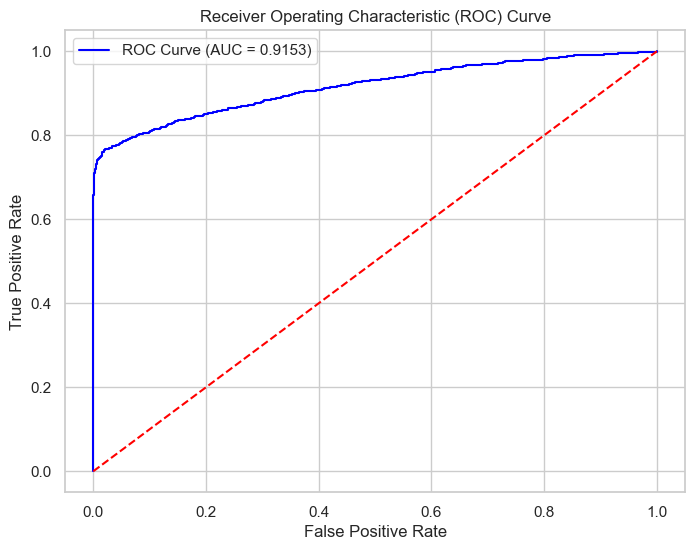

In [411]:
# Initialize GradientBoostingClassifier
gb1 = GradientBoostingClassifier(random_state=42)

# Define the parameter grid for tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 10]
}

# Using RandomizedSearchCV for faster tuning
gb1_random = RandomizedSearchCV(estimator=gb1, param_distributions=param_grid, n_iter=100,
                                cv=3, verbose=2, random_state=42, n_jobs=-1)

# Fit the model
gb1_random.fit(X_train, y_train)

# Print the best parameters from tuning
print("Best parameters found: ", gb1_random.best_params_)

# Predicting on the test data
y_pred = gb1_random.best_estimator_.predict(X_test)
y_prob_rf = gb1_random.best_estimator_.predict_proba(X_test)[:, 1]

# Accuracy
accuracy = accuracy_score(y_test, y_pred)

# Precision
precision = precision_score(y_test, y_pred)

# Recall
recall = recall_score(y_test, y_pred)

# F1 Score
f1 = f1_score(y_test, y_pred)

# ROC AUC
roc_auc = roc_auc_score(y_test, y_prob_rf)

# Evaluation
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'ROC AUC: {roc_auc:.4f}')
print("Classification Report:\n", classification_report(y_test, y_pred))

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob_rf)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [412]:
joblib.dump(gb1_random.best_estimator_, 'final_gradient_boosting_model.pkl')
print("Model saved as 'final_gradient_boosting_model.pkl")

Model saved as 'final_gradient_boosting_model.pkl


In [ ]:
model=joblib.load('best_gradient_boosting_model.pkl')

In [1]:
import pandas as pd

df1=pd.DataFrame({
    'Age':31,
    'Gender':0  ,
    'Income':70000,
    'Employment_Status':0,
    'Location':2,
    'Credit_Score':650,
    'Debt_to_Income_Ratio':0.34,
    'Existing_Loan_Balance':15735,
    'Loan_Amount':100000,
    'Interest_Rate':18,
    'Loan_Duration_Months':24
},index=[0])

In [2]:
df1

,Age,Gender,Income,Employment_Status,Location,Credit_Score,Debt_to_Income_Ratio,Existing_Loan_Balance,Loan_Amount,Interest_Rate,Loan_Duration_Months
0,31,0,70000,0,2,650,0.34,15735,100000,18,24


In [ ]:
result=model.predict(df1)

In [431]:
if result==1:
  print("person will default")
else:
  print("person will not default")

person will default
